# Environment: Kaggle notebook

In [1]:
!pip install -U ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mkl-fft to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-random to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-umath to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 94.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [8]:
# Uninstall ALL OpenCV related packages to clear the conflict
!pip uninstall -y opencv-python opencv-python-headless opencv-contrib-python

# Install a specific, stable version of headless OpenCV
# (4.10.x is currently very stable; 4.12.x is cutting edge/unstable)
!pip install opencv-python-headless==4.10.0.84
!pip install "numpy<2"

# Restart the kernel after running this cell

Found existing installation: opencv-python-headless 4.10.0.84
Uninstalling opencv-python-headless-4.10.0.84:
  Successfully uninstalled opencv-python-headless-4.10.0.84
  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.9 MB)


In [4]:
from ultralytics import YOLO

model = YOLO('yolo12m.pt') 

# Train
results = model.train(
    data='/kaggle/input/aolp-yolo/AOLP_YOLO/data.yaml',
    epochs=100,       
    imgsz=640,       
    batch=8,      
    patience=15,
    optimizer="AdamW",
    lr0=0.002,
    weight_decay=0.0005,
    lrf=0.01,
    warmup_epochs=3,
    cos_lr=False,
    box=7.5,
    cls=0.5,
    dfl=1.5,
    name='FYP_ANPR'
)

Ultralytics 8.3.241 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/aolp-yolo/AOLP_YOLO/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.002, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12m.pt, momentum=0.9, mosaic=1.0, multi_scale=False, name=FYP_ANPR2, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=15, perspective=0.0, 

In [7]:
# Load the best model from your current training run
# Note: 'runs/detect/Hunter_Phase3' depends on the 'name' you set in training
# If you didn't set a name, it might be 'runs/detect/train'
model = YOLO('/kaggle/working/runs/detect/FYP_ANPR2/weights/best.pt')

# Run validation on the TEST split
metrics = model.val(split='test', plots=True)

print(f"mAP@50 (Accuracy): {metrics.box.map50:.4f}")
print(f"mAP@50-95 (Robustness):{metrics.box.map:.4f}")
print(f"Precision: {metrics.box.mp:.4f}")
print(f"Recall: {metrics.box.mr:.4f}")
precision = metrics.box.mp
recall = metrics.box.mr
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"F1 Score: {f1_score:.4f}")

Ultralytics 8.3.241 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12m summary (fused): 169 layers, 20,105,683 parameters, 0 gradients, 67.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 63.6±46.7 MB/s, size: 30.3 KB)
val: Scanning /kaggle/input/aolp-yolo/AOLP_YOLO/labels/test... 206 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 206/206 1.1Kit/s 0.2s<0.3s
WARNING ⚠️ val: Cache directory /kaggle/input/aolp-yolo/AOLP_YOLO/labels is not writable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 1.9it/s 6.8s0.5s
                   all        206        206      0.975      0.995       0.99      0.681
Speed: 1.4ms preprocess, 27.0ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /kaggle/working/runs/detect/val3
mAP@50 (Accuracy): 0.9898
mAP@50-95 (Robustness):0.6814
Precision: 0.9750
Recall: 0.9951
F1 Score: 0.9850


In [8]:
inference_results = model.predict(
    source='/kaggle/input/aolp-yolo/AOLP_YOLO/images/test', 
    conf=0.50, 
    save=True,
    imgsz=640
)


image 1/206 /kaggle/input/aolp-yolo/AOLP_YOLO/images/test/Subset_AC_108.jpg: 448x640 1 license_plate, 53.7ms
image 2/206 /kaggle/input/aolp-yolo/AOLP_YOLO/images/test/Subset_AC_109.jpg: 448x640 1 license_plate, 32.0ms
image 3/206 /kaggle/input/aolp-yolo/AOLP_YOLO/images/test/Subset_AC_114.jpg: 448x640 1 license_plate, 32.0ms
image 4/206 /kaggle/input/aolp-yolo/AOLP_YOLO/images/test/Subset_AC_116.jpg: 448x640 1 license_plate, 32.0ms
image 5/206 /kaggle/input/aolp-yolo/AOLP_YOLO/images/test/Subset_AC_12.jpg: 448x640 1 license_plate, 25.1ms
image 6/206 /kaggle/input/aolp-yolo/AOLP_YOLO/images/test/Subset_AC_133.jpg: 448x640 1 license_plate, 21.2ms
image 7/206 /kaggle/input/aolp-yolo/AOLP_YOLO/images/test/Subset_AC_137.jpg: 448x640 1 license_plate, 21.2ms
image 8/206 /kaggle/input/aolp-yolo/AOLP_YOLO/images/test/Subset_AC_139.jpg: 448x640 1 license_plate, 21.2ms
image 9/206 /kaggle/input/aolp-yolo/AOLP_YOLO/images/test/Subset_AC_142.jpg: 448x640 1 license_plate, 20.7ms
image 10/206 /kaggl

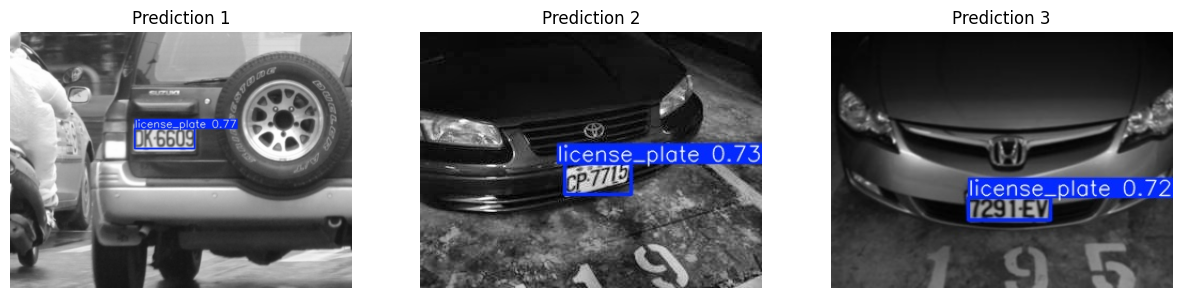

In [9]:
import glob
import random
import matplotlib.pyplot as plt
import cv2

# Get list of all saved prediction images
pred_images = glob.glob('/kaggle/working/runs/detect/predict/*.jpg') 

# Pick 3 random images to display
if len(pred_images) > 0:
    samples = random.sample(pred_images, min(3, len(pred_images)))

    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(samples):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Fix color for Matplotlib
        
        plt.subplot(1, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Prediction {i+1}")
    plt.show()
else:
    print("No predictions found. Check your paths.")

In [10]:
!zip -r detection.zip /kaggle/working/runs/detect/

  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/val/ (stored 0%)
  adding: kaggle/working/runs/detect/val/BoxR_curve.png (deflated 17%)
  adding: kaggle/working/runs/detect/val/BoxP_curve.png (deflated 20%)
  adding: kaggle/working/runs/detect/val/confusion_matrix_normalized.png (deflated 37%)
  adding: kaggle/working/runs/detect/val/val_batch0_labels.jpg (deflated 23%)
  adding: kaggle/working/runs/detect/val/BoxPR_curve.png (deflated 29%)
  adding: kaggle/working/runs/detect/val/val_batch2_labels.jpg (deflated 10%)
  adding: kaggle/working/runs/detect/val/val_batch2_pred.jpg (deflated 10%)
  adding: kaggle/working/runs/detect/val/confusion_matrix.png (deflated 35%)
  adding: kaggle/working/runs/detect/val/val_batch0_pred.jpg (deflated 23%)
  adding: kaggle/working/runs/detect/val/BoxF1_curve.png (deflated 15%)
  adding: kaggle/working/runs/detect/val/val_batch1_labels.jpg (deflated 21%)
  adding: kaggle/working/runs/detect/val/val_batch1_pred.jp

In [11]:
from IPython.display import FileLink
FileLink('detection.zip')

/kaggle/working/detection.zip